# 1111 爬蟲


In [1]:
import requests
import json
import re
import csv
from bs4 import BeautifulSoup
import time

# 視覺化
import matplotlib.pyplot as plt
import pandas as pd # 引用套件並縮寫為 pd  

from pandas import Series, DataFrame 

job_url = 'https://www.1111.com.tw/job-bank/job-index.asp?si=1&ks={}&page={}'

DATA_PATH = '/tmp/hw_data'
filelist = []
words = []

# 抓出單頁


In [2]:
def get_list_page(url):
    
    HOST = 'https:'
    resp = requests.get(url)
    links = re.findall('<a href="(//www.1111.com.tw/job/.+/)" .+>.+</a>', resp.text)
    detail_page_links = [HOST + link for link in links]
    return detail_page_links    

In [69]:
!mkdir /tmp/hw_data

In [68]:
! rm -r -f /tmp/hw_data

In [4]:
def dump_page(url):  
    filename = url.split('/')[-2]
    resp = requests.get(url)
    with open(DATA_PATH + '/' + filename, 'w') as f:
        f.write(resp.text)
    return filename

In [5]:
def get_list(url):
    filename = url.split('/')[-2]
    filelist.append(filename)

In [6]:
def do_page(num1 ,a):   
    print('職缺 '+a)
    print('共抓'+str(num1)+'頁')
    count = 0
    filelist = []
    start = time.time()
    for page in range(num1) :
        the_url = job_url.format(a,page+1)
        for link in get_list_page(the_url):
            dump_page(link)
            count+=1
            get_list(link)
    end = time.time()
    elapsed = end - start
    print('共'+str(count)+'筆職缺')
    print("花費", elapsed, "秒")

In [70]:
do_page(130,'資料庫')

職缺 資料庫
共抓130頁
共2324筆職缺
花費 638.8969190120697 秒


In [15]:
! ls /tmp/hw_data

In [71]:
filelist

['79837836',
 '78399650',
 '80171269',
 '80255135',
 '80253474',
 '71459867',
 '79836797',
 '78330397',
 '80211220',
 '80256710',
 '79105863',
 '80209954',
 '79942931',
 '80214580',
 '79811207',
 '79001886',
 '77806020',
 '80248483',
 '79923188',
 '80172655',
 '76811887',
 '76811999',
 '77784479',
 '54580703',
 '79840654',
 '79875924',
 '79754758',
 '79728217',
 '80261753',
 '79105865',
 '80248369',
 '75724583',
 '79743187',
 '80056254',
 '80258774',
 '79821211',
 '80225606',
 '79957368',
 '79776307',
 '80264069',
 '80262525',
 '79937902',
 '80114471',
 '79760316',
 '80193908',
 '77784483',
 '79363815',
 '76811989',
 '79112522',
 '80248214',
 '80248355',
 '80202497',
 '78490398',
 '79105866',
 '80212581',
 '78506624',
 '75873774',
 '76811909',
 '79893984',
 '79959694',
 '79744314',
 '79886016',
 '76645127',
 '80099012',
 '80091149',
 '79940349',
 '77307504',
 '79866731',
 '80180312',
 '76671879',
 '71582332',
 '80237299',
 '80227175',
 '80252591',
 '80251539',
 '79894716',
 '80256756',

# 內文清理

In [72]:
words 

[]

In [73]:
#讀內文

for l in filelist:
    with open(DATA_PATH + '/' + l) as f:
        html = f.read()
        soup = BeautifulSoup(html, 'lxml')
        data = soup.find_all('div',{'class':'listContent'})
        for a in range(len(data)):
            words.extend(data[a].text.split('、'))
filelist = []

In [74]:
#建技能表
with open('data/skill.txt') as sk:
    skilllist =  sk.read()
skill = skilllist.split('\n')
skill.remove('')

In [75]:
# 計次歸零
counter = {}
for b in skill:
    counter[b]=0

In [76]:
# 計次
def get_skill(list):    
    for a in range(len(list)):
        word = list[a]
        if word in skill:                            
            counter[word]+=1
    return counter


In [77]:
dictskill = get_skill(words)

In [78]:
words = []

In [27]:
# 字典排序（轉成tuple）
countskill = sorted(dictskill.items(),key = lambda item:item[1],reverse=True)

In [79]:
#使用DataFrame
thedf = DataFrame([i for i in dictskill.items()],columns = ['技能','數量']) 

In [80]:
#使用DataFrame排序
newdf = thedf[thedf.數量 != 0].sort_values(["數量"],ascending=False)
newdf.index = range(len(newdf))

In [81]:
newdf

,技能,數量
0,MS SQL,287
1,ASP.NET,185
2,C#.NET,170
3,JAVA,168
4,MySQL,162
5,HTML,129
6,Oracle,126
7,LINUX,123
8,jQuery,121
9,PHP,103


# 輸出Json 、 CSV

In [65]:
def get_json(dict,file):
    with open(file, 'w') as f:
        json.dump(dict,f)

In [20]:
def get_csv(dict,file):
    with open(file,'w') as f:
        w=csv.writer(f)
        # write all keys on one row and all values on the next
        w.writerow(dict.keys())
        w.writerow(dict.values())

In [29]:
def get_tupletocsv(list,file):

    with open(file,'w') as out:
        csv_out=csv.writer(out)
        csv_out.writerow(['技能','數量'])
        for row in list:
            csv_out.writerow(row)

In [82]:
#DataFrame轉成CSV
newdf.to_csv('data/資料庫技能.csv',index=False)

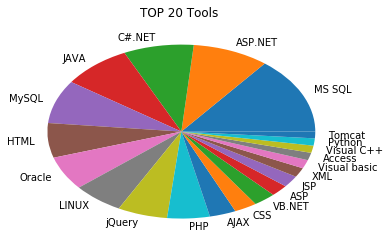

In [83]:
Y=newdf.loc[0:20,'技能']
X=newdf.loc[0:20,'數量']


plt.pie(X,labels=Y)
plt.title('TOP 20 Tools ')
plt.show()

# 視覺化

In [162]:
#用PANDAS開一個CSV
df = pd.read_csv('data/程式設計師技能.csv')  

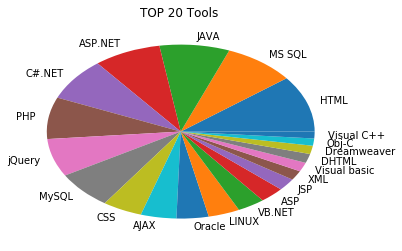

In [163]:
Y=df.loc[0:20,'技能']
X=df.loc[0:20,'數量']


plt.pie(X,labels=Y)
plt.title('TOP 20 Tools')
plt.show()